In [1]:
# Libraries
import soundfile
import numpy as np
import functions as my_f

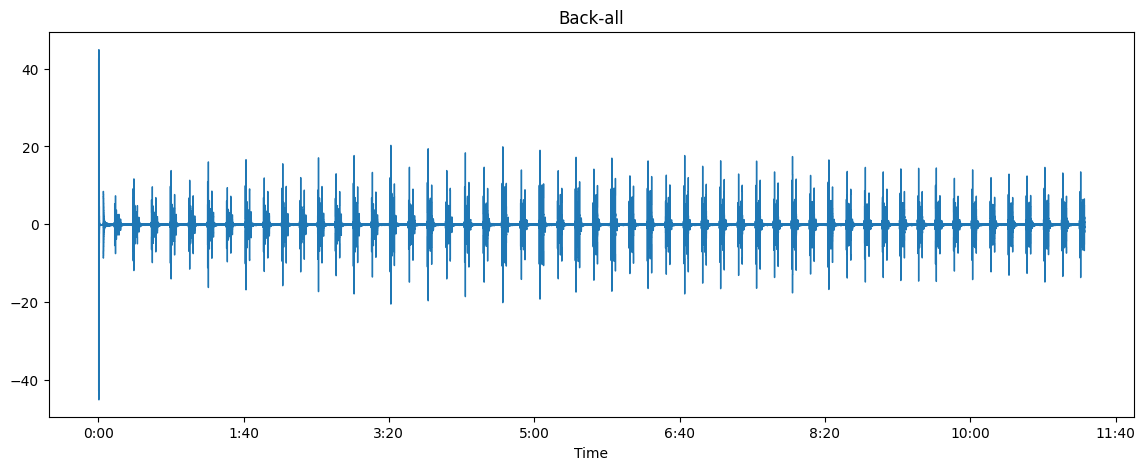

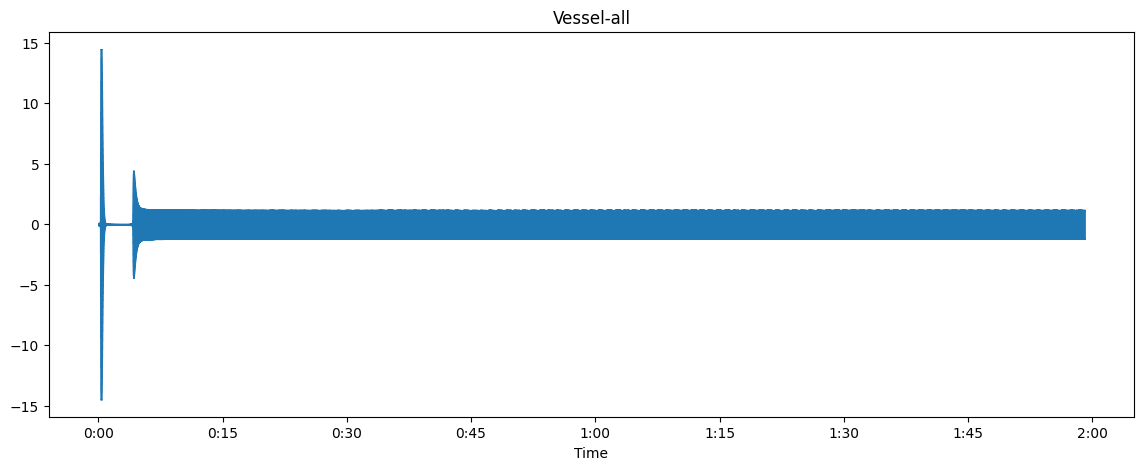

In [2]:
# Reading wav file
s_back, sr_back = soundfile.read('background.wav', dtype='float32')
s_vessel, sr_vessel = soundfile.read('vessel.wav', dtype='float32')
# normalize db
s_back = my_f.standardization(s_back)
s_vessel = my_f.standardization(s_vessel)
# plot files
my_f.plot_signal(s_back, sr=sr_back, name='Back-all')
my_f.plot_signal(s_vessel, sr=sr_vessel, name='Vessel-all')

In [9]:
# Define parameters
# Signal: to cut the signal
si = sr_back*10
sf = si + sr_back*1
# Spectrogram: to perform the STFT (milliseconds)
ms = 30
# EMD: to divide into stochastic and deterministic threshold
cutoff = 0.025

80000 88000


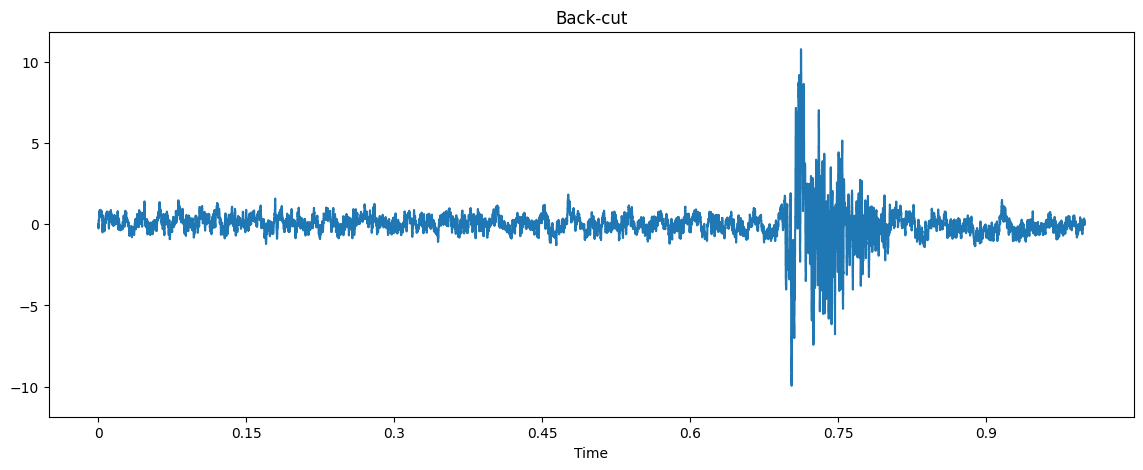

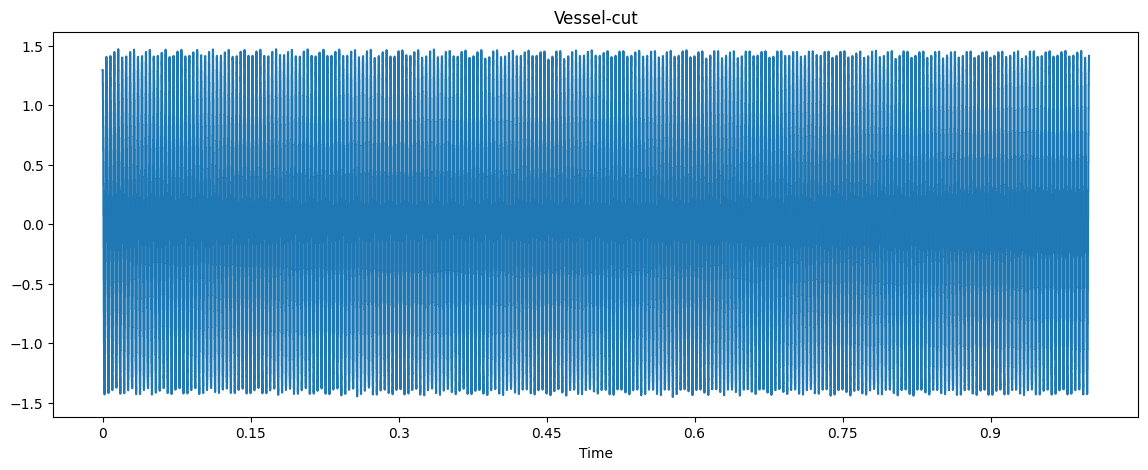

In [10]:
# Cut signal to get 1 second in the middle

sb = s_back[si:sf]
sv = s_vessel[si:sf]
print(f'{si} {sf}')

sb = my_f.standardization(sb)
sv = my_f.standardization(sv)

my_f.save_audio(sb, sr=sr_back, name='back_cut')
my_f.save_audio(sv, sr=sr_vessel, name='vessel_cut')

# plot files
my_f.plot_signal(sb, sr=sr_back, name='Back-cut')
my_f.plot_signal(sv, sr=sr_vessel, name='Vessel-cut')

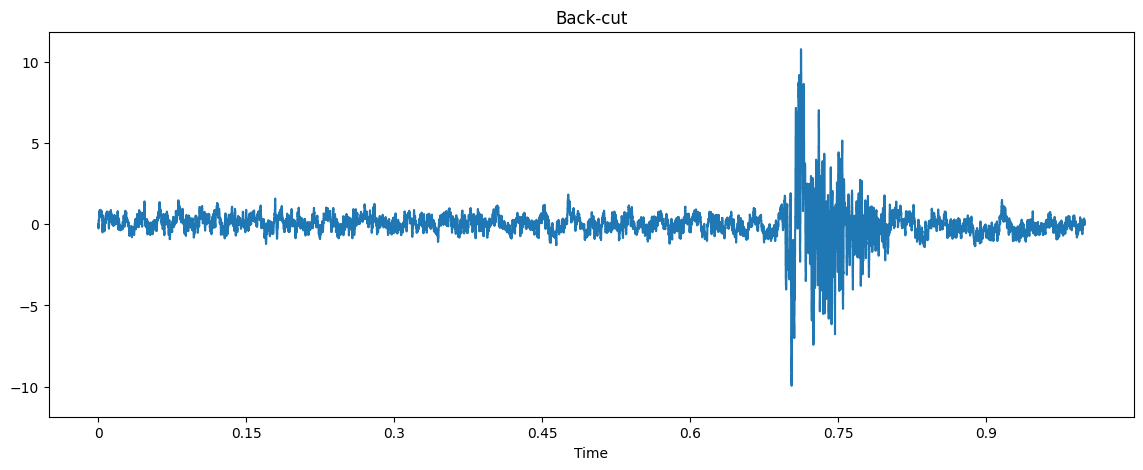

c:\users\martha\documents\project\audiotest\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


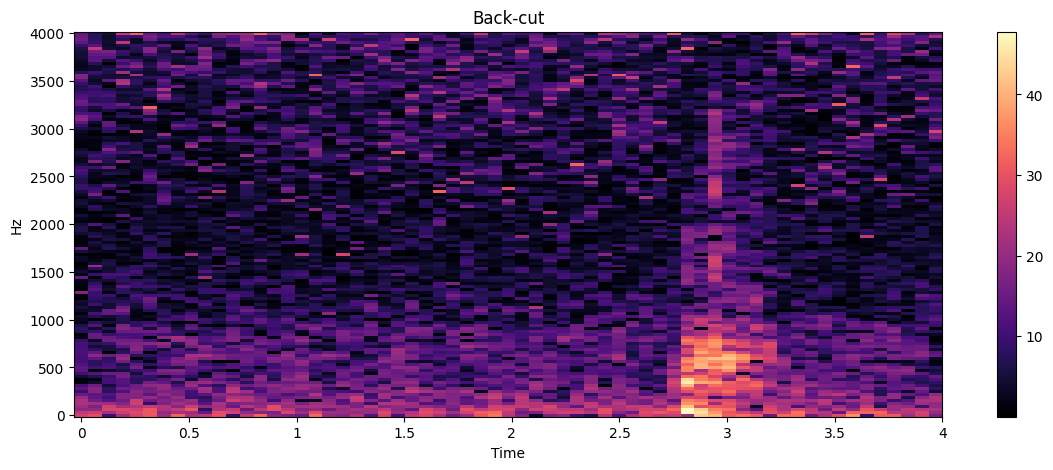

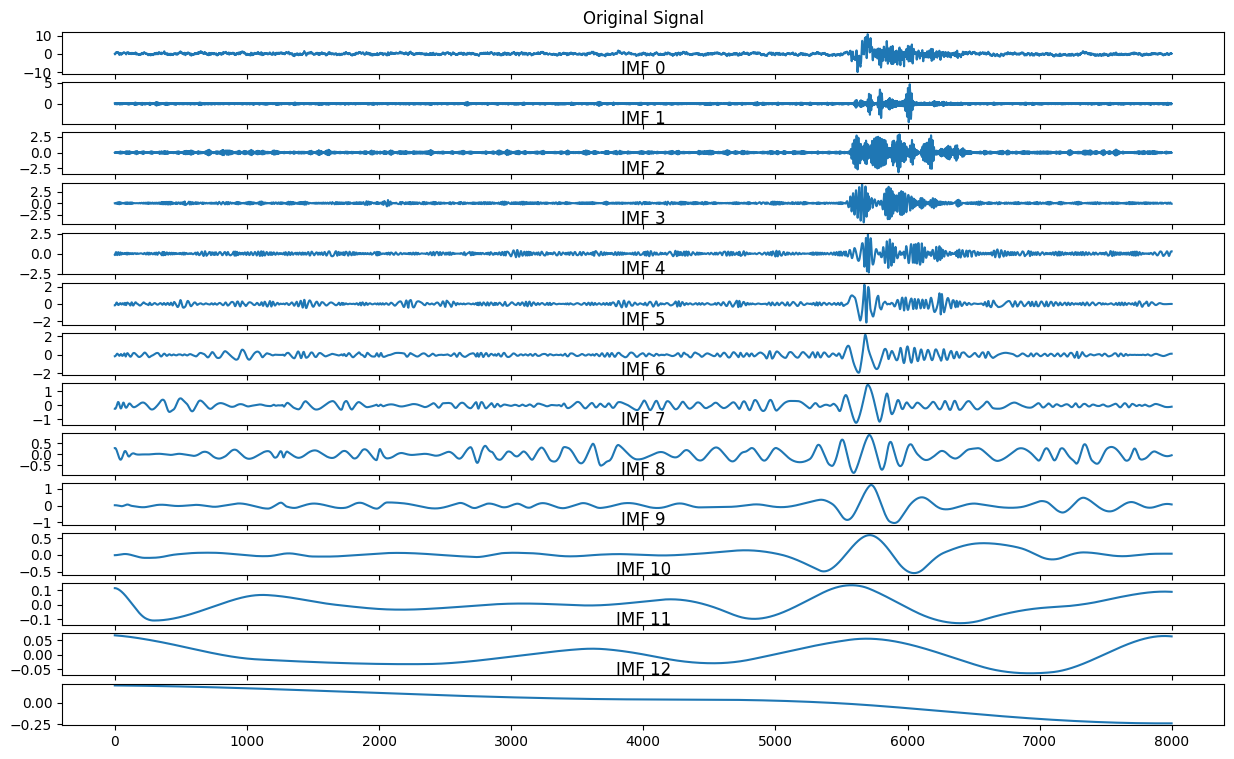

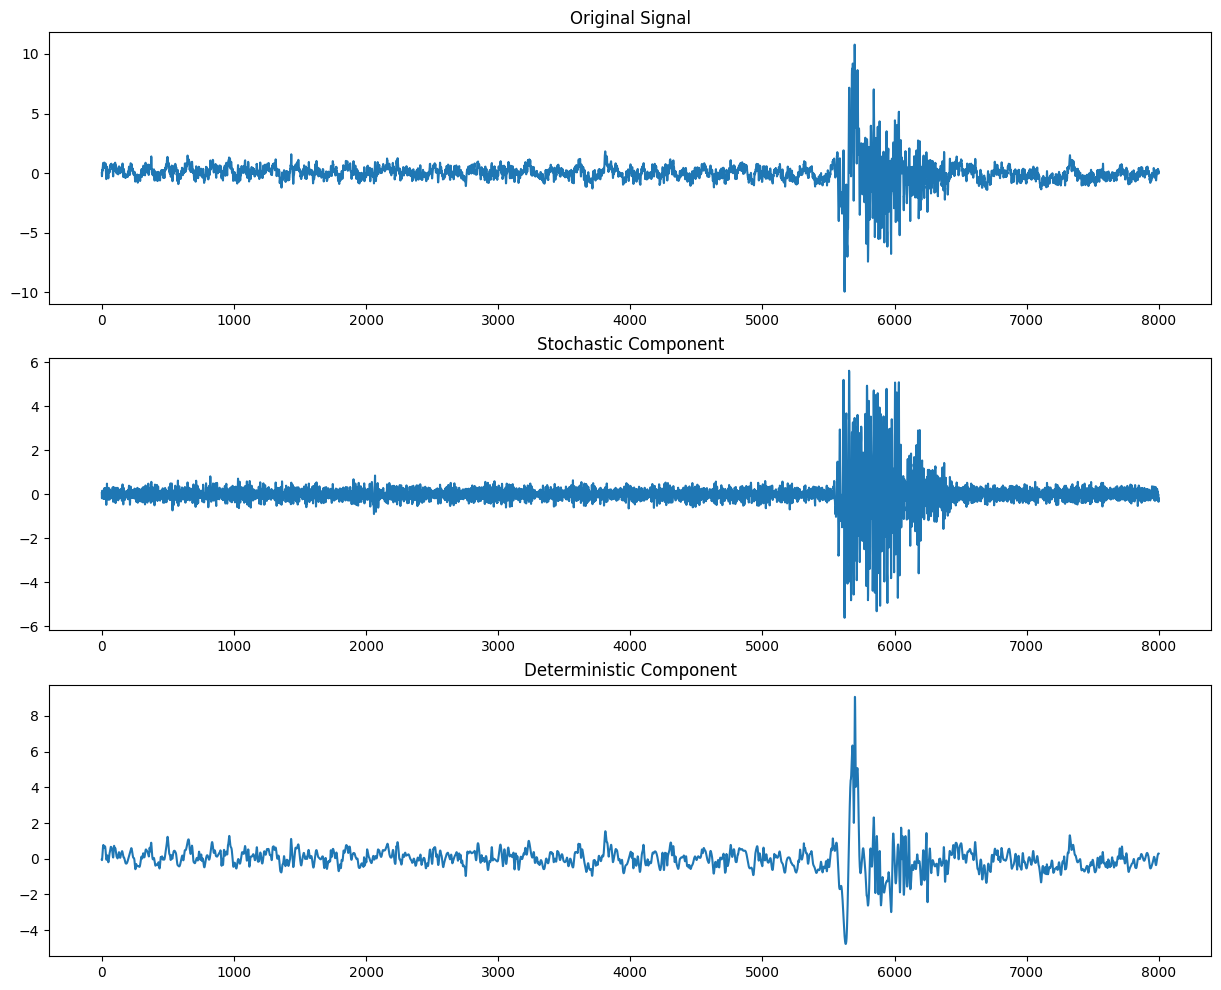

c:\users\martha\documents\project\audiotest\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


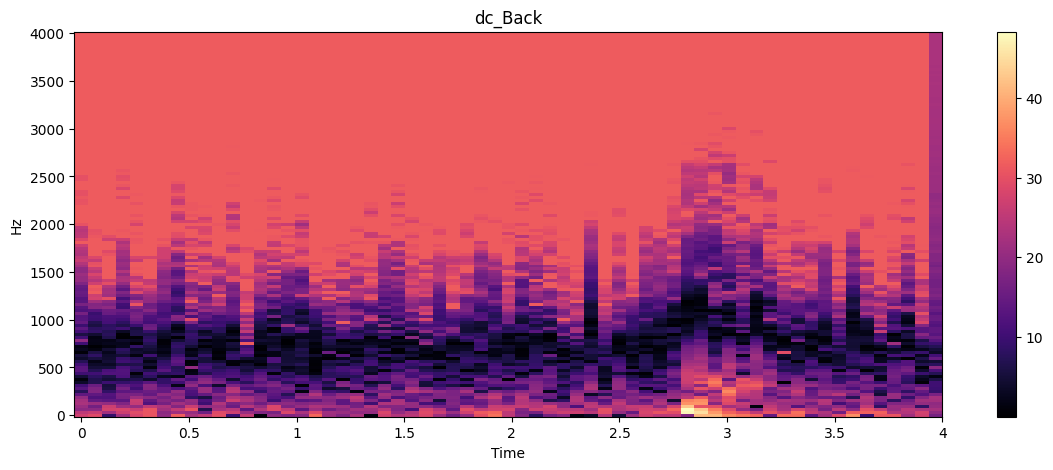

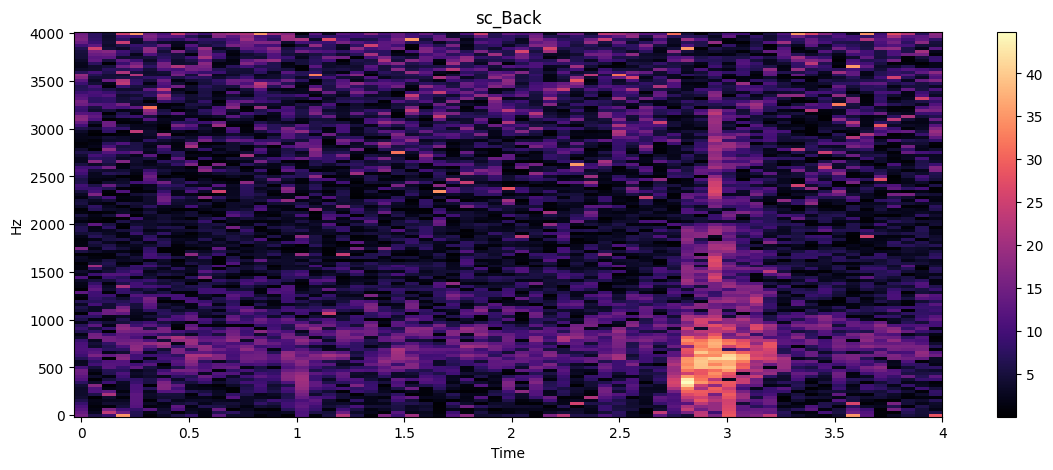

In [11]:
# Analyze Background
my_f.plot_signal(sb, sr=sr_back, name='Back-cut')
my_f.spec_plot(sb, ms=ms, sr=sr_back, name='Back-cut')
sc_back, dc_back, imfs_b = my_f.get_components(sb, cutoff=cutoff)
my_f.spec_plot(dc_back, ms=ms, sr=sr_back, name='dc_Back')
my_f.spec_plot(sc_back, ms=ms, sr=sr_back, name='sc_Back')
my_f.save_audio(dc_back, sr=sr_vessel, name='dc_back')
my_f.save_audio(sc_back, sr=sr_vessel, name='sc_back')

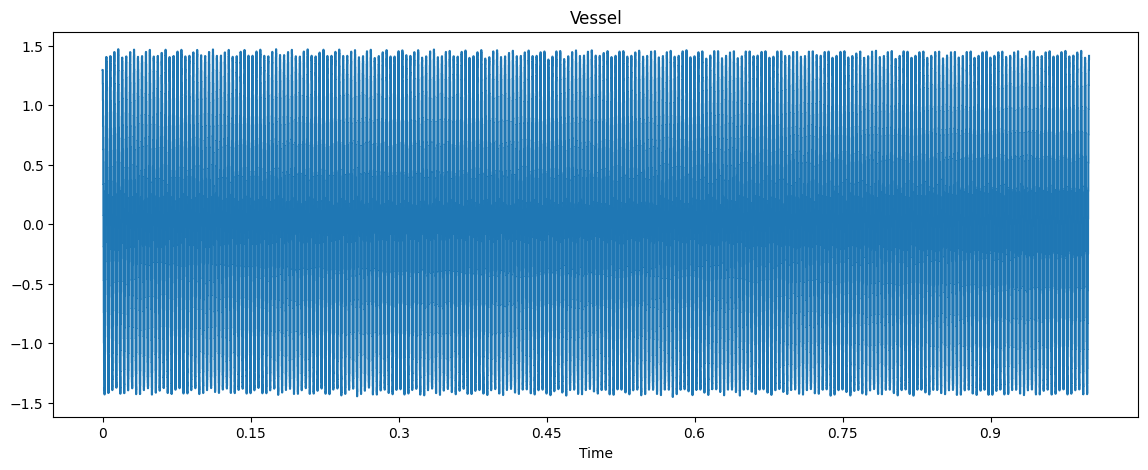

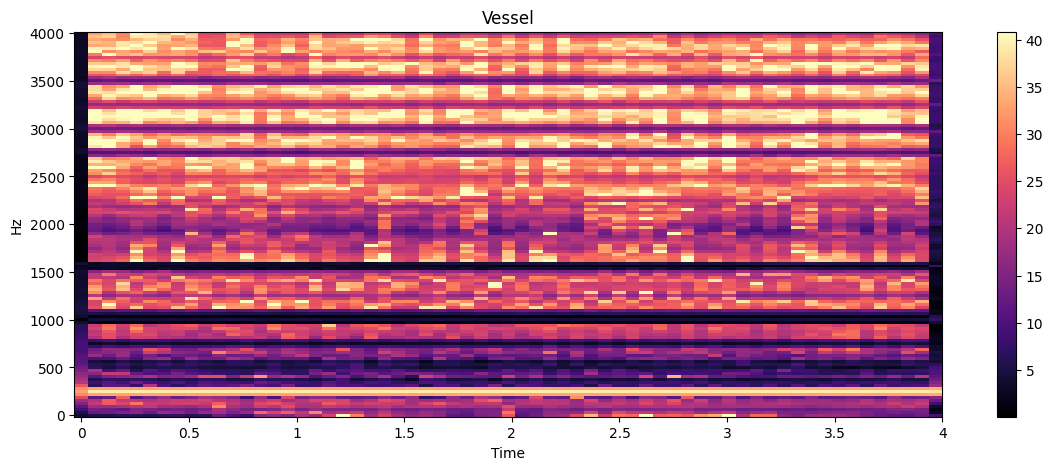

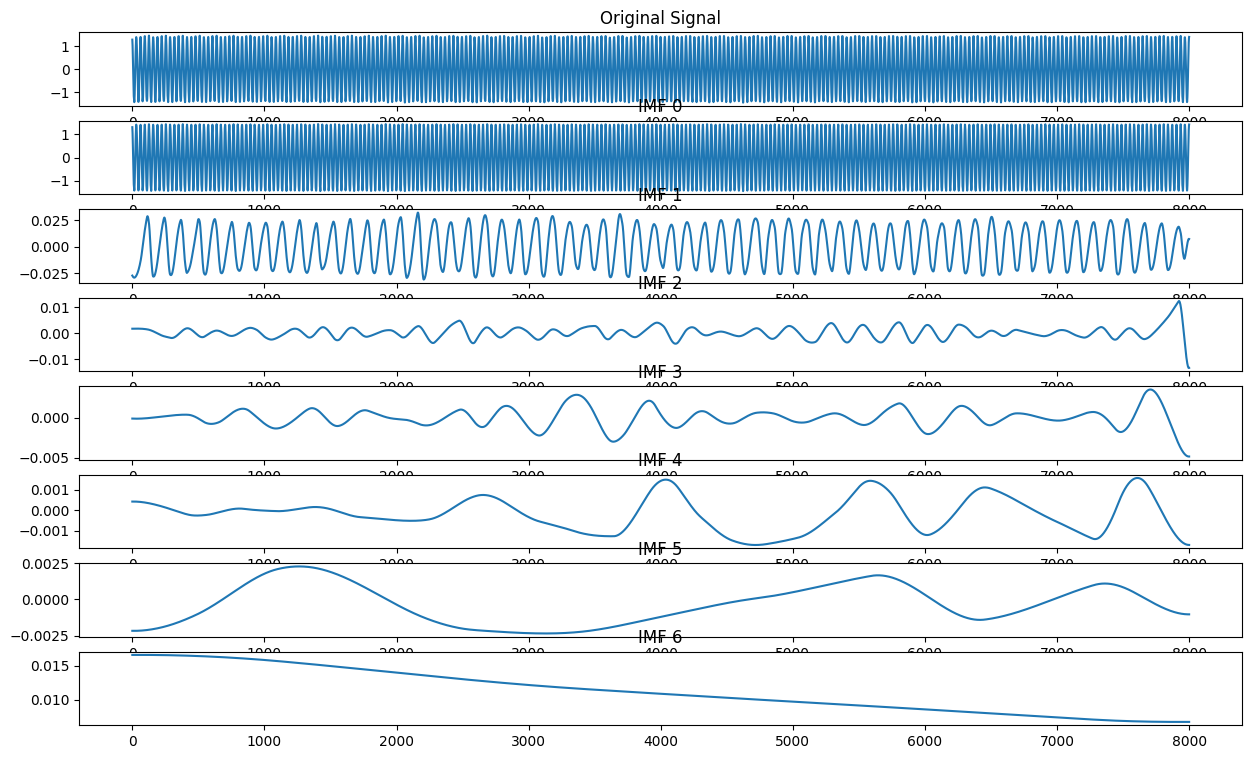

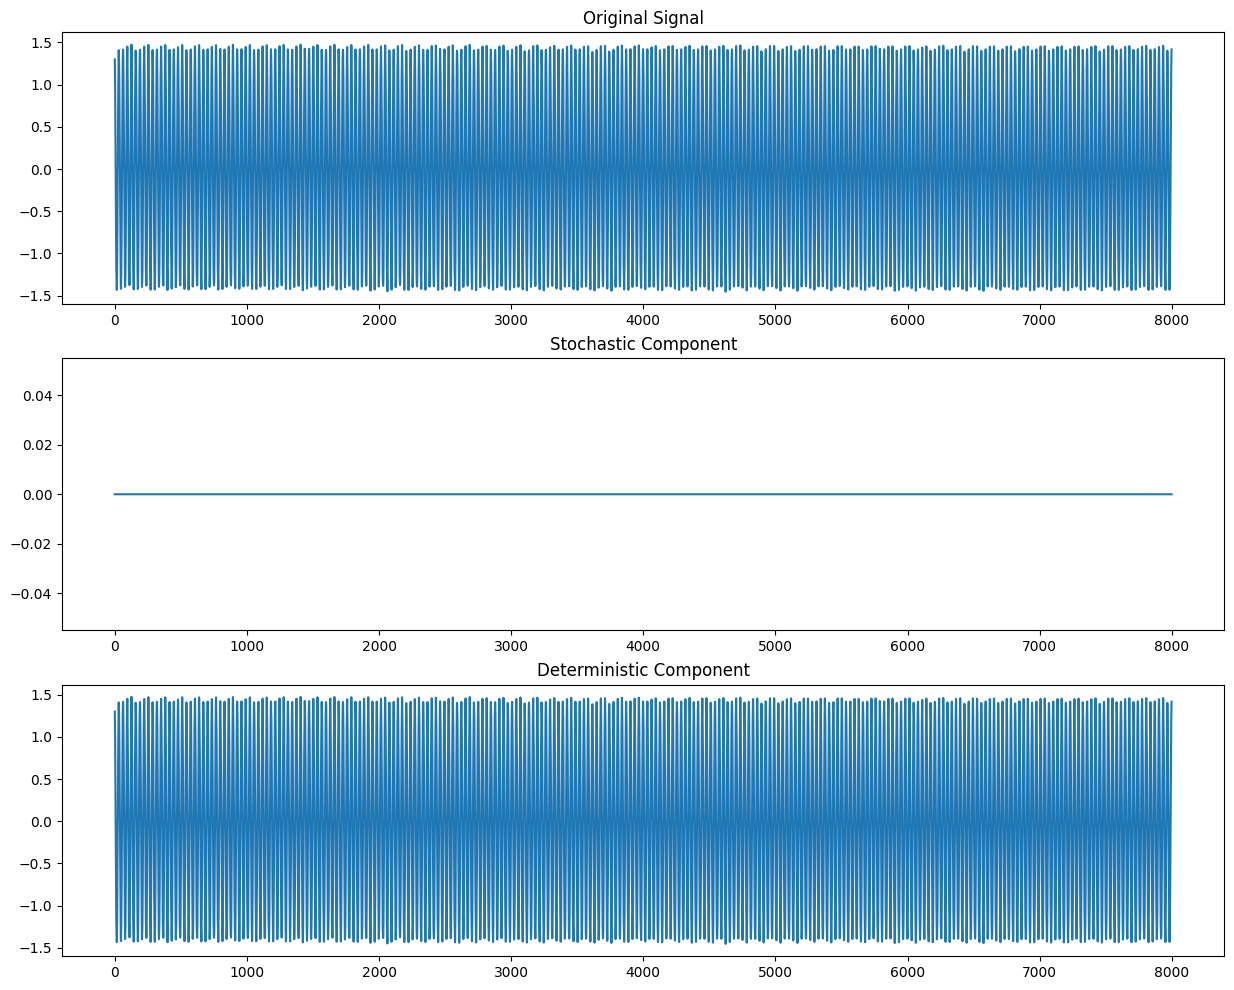

c:\users\martha\documents\project\audiotest\venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


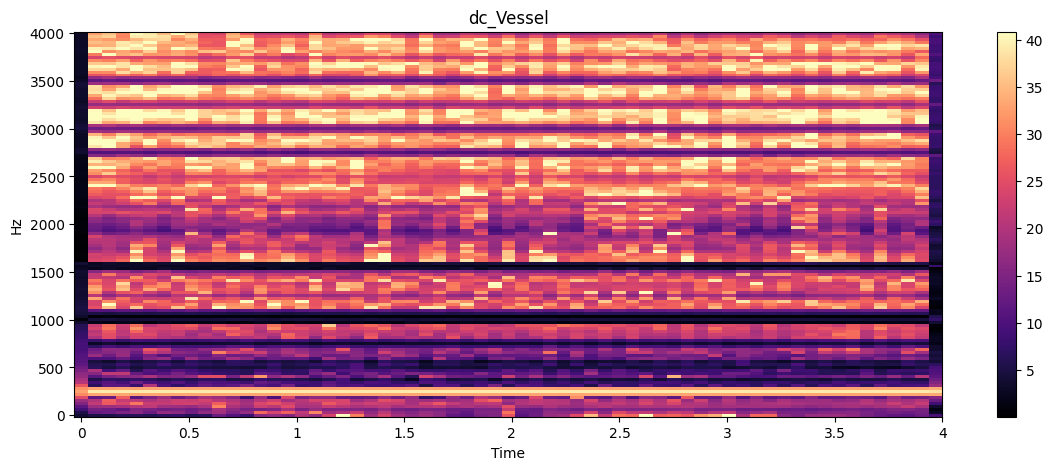

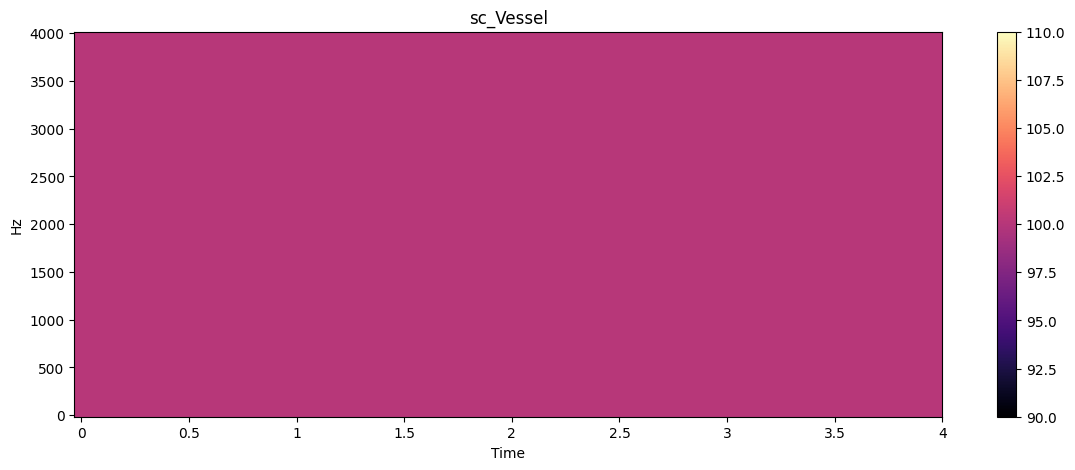

In [12]:
# Analyze Vessel
my_f.plot_signal(sv, sr=sr_back, name='Vessel')
my_f.spec_plot(sv, ms=ms, sr=sr_vessel, name='Vessel')
sc_vessel, dc_vessel, imfs_v = my_f.get_components(sv, cutoff=cutoff)
my_f.spec_plot(dc_vessel, ms=ms, sr=sr_back, name='dc_Vessel')
my_f.spec_plot(sc_vessel, ms=ms, sr=sr_back, name='sc_Vessel')
my_f.save_audio(dc_vessel, sr=sr_vessel, name='dc_v')
my_f.save_audio(sc_vessel, sr=sr_vessel, name='sc_v')

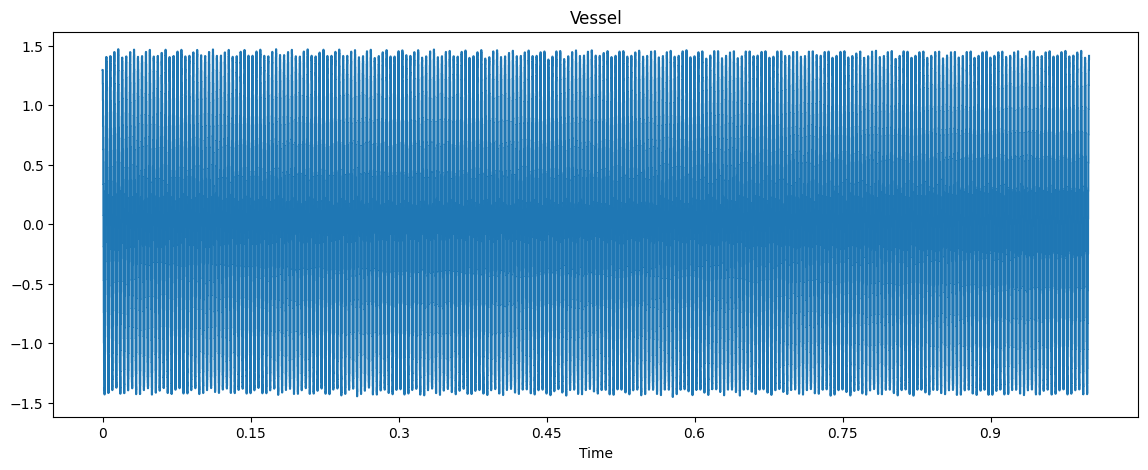

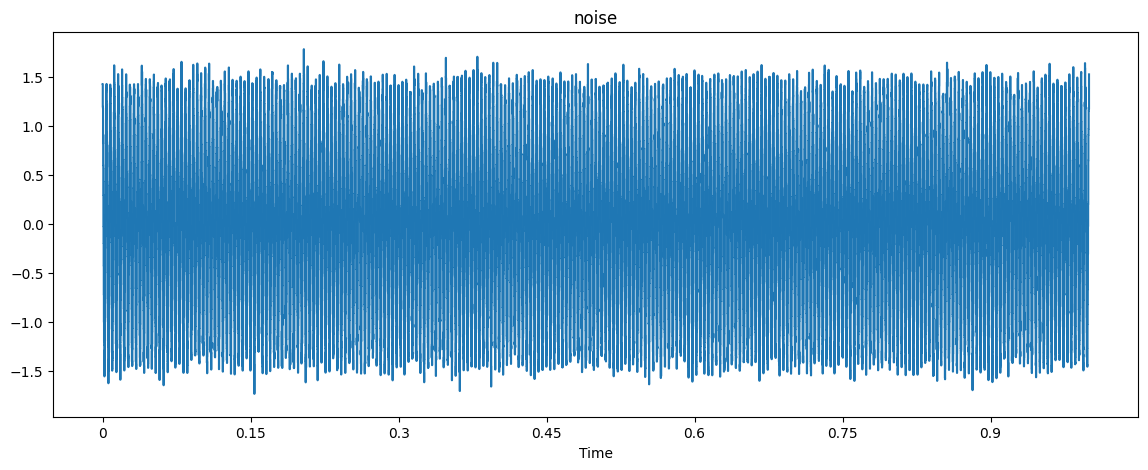

In [14]:
# Adding white noise
ns = my_f.add_white_noise(sv, alpha=0.1)
my_f.plot_signal(sv, sr=sr_back, name='Vessel')
my_f.plot_signal(ns, sr=sr_back, name='noise')
my_f.save_audio(ns, sr=sr_vessel, name='noise')

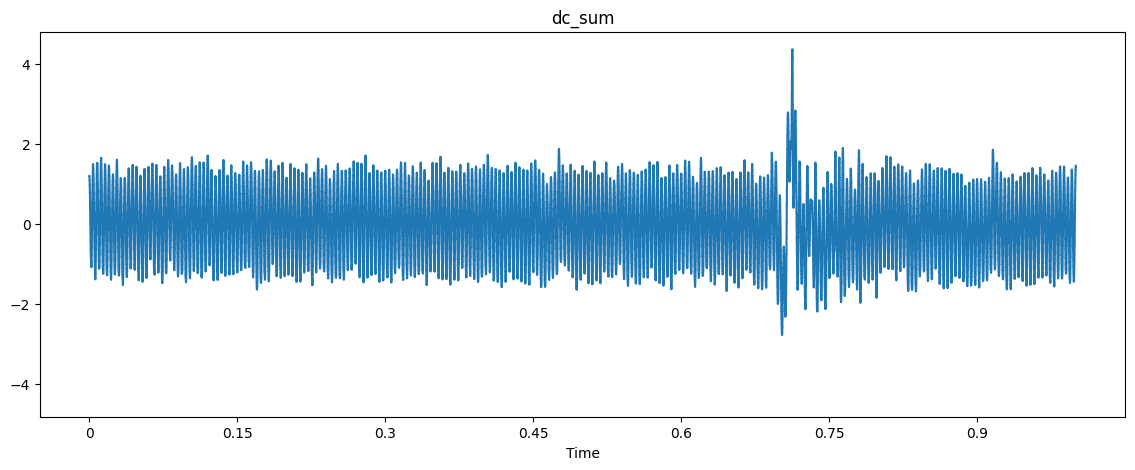

In [16]:
# Mix of Background and vessel
dc_sum = dc_vessel*0.7 + dc_back*0.3
dc_sum = my_f.standardization(dc_sum)
my_f.plot_signal(dc_sum, sr=sr_back, name='dc_sum')
my_f.save_audio(dc_sum, sr=sr_vessel, name='dc_sum')